### Bound-free Gaunt factor calculated following Karzas and Latter 1961.

The bound free Gaunt factor is defined as

$$ g_{bf} = \frac{\sigma_{bf}}{\sigma_{bf}^{K}} $$

where 

$\sigma_{bf} $ is the quantum-mechanical bound-free cross-section

$ \sigma_{bf}^{K} $ is the semi-classical Kramer's cross-section

For reference, see equation 40 of Karzas and Latter 1961.


In [130]:
%reset
import math 
import numpy as np 
import matplotlib.pyplot as plt 

# Constants in CGS units: http://www.astro.wisc.edu/~dolan/constants.html
R = 2.1798741e-11 # Rydber's constant [erg]
c = 2.99792458e10 # speed of light [cm s-1.]
e_charge = 4.8032068e-10 # electron charge [esu]
e_mass = 9.1093897e-28 # electron mass [g]
v = 1/(10.**(-5)) # what should I set this to?

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [154]:
# General function for the gaunt factor
def get_gaunt_factor_bf(sigma_bf_above, sigma_bf_kramer): 
    gaunt_factor = (sigma_bf_above)/sigma_bf_kramer
    return gaunt_factor

# Kramer's cross section (39)
def get_kramer_sigma(n, E, Z): 
    
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n

    kramer_sigma = 2.**4./(3*math.sqrt(3.))*e_charge**2./(e_mass*c*v) *1./n *(rho**2/(1+rho**2))**2. 
    return kramer_sigma

# Quantum cross section going to l-1 (36)
# def sigma_bf_below(n, l, E, Z): 
    
#     eta = math.sqrt(Z*Z*R/E)
#     rho = eta/n

#     p1 = math.pi*e_charge**2/(e_mass*c*v)
#     p2 = 2.**(4*l)/3.
    
#     p3 = l**2 * math.factorial(n+l)
    
#     l = int(l)
    
#     # make sure we're counting for the extreme cases, when l = 0 or 1
#     if l == 0: 
#         return 0
#     elif l ==1: 
#         p3 = 1
#     else:
#         for i in range(1, l): 
#             p3 *= (i**2 + eta**2)
    
#     # the factorial of a negative number does not exist
#     if n-l-1<0: 
#         return 0
#     else:
#         p4 = math.factorial(2*l+1) *math.factorial(2*l-1) * math.factorial(n-l-1)
    
#     p5 = math.exp(-4*eta*math.atan(1/rho))/(1-math.exp(-2*math.pi*eta)) # do I have the arctan function right?
#     # also is this an exponential or just the charge 

#     p6 = rho**(2*l+2)/(1+rho**2)**(2*n-2)
    
#     p7 = (G_l(l,-(l+1-n),eta,rho)-(1+rho**2)**(-2)*G_l(l,-(l-1-n),eta,rho))**2 # still need to define G_l
    
#     all_together = p1*p2*p3/p4*p5*p6*p7
    
#     return all_together

# Quantum cross section going to l+1 (37)
def sigma_bf_above(n, l, E, Z): 
    
    eta = math.sqrt(Z*Z*R/E)
    rho = eta/n
    
    p1 = math.pi*e_charge**2/(e_mass*c*v)
    
    p2 = 2.**(4*l+6)/3.
    

    p3= (l+1)**2 * math.factorial(n+l)

    l = int(l)
    n = int(n)
    
#     print "First", p3, l
    for i in range(1,l+2): 
#         print i
        p3 *= (i**2+eta**2)
    
#     print "Then", p3, l
    
    if n-l-1<0: 
        return 0
    else:
        p4 = (2*l+1)*math.factorial(2*l+1)*math.factorial(2*l+2)*math.factorial(n-l-1)*((l+1)**2+eta**2)**2
    
    p5 = math.exp(-4*eta*math.atan(1/rho))/(1-math.exp(-2*math.pi*eta)) # is this exponential or electron charge 
#     print p5 
    
    p6 = rho**(2*l+4)*eta**2/(1+rho**2)**(2*n)
    
    p7 = ((l+1-n)*G_l(l+1,-(l+1-n),eta,rho)+(l+1+n)/(1+rho**2)*G_l(l+1,-(l-n),eta,rho))**2 # still need to define G_l
    
#     print E, p6, eta**2.
    
#     print p4, eta**4.

#     print G_l(l+1,-(l-n),eta,rho), eta**2
    
    all_together = p1*p2*p3/p4*p5*p6*p7
    
    return all_together

# Bound free matrix element Gl (appendix C)
def G_l(l, m, eta, rho): 
    
    m = int(m)
    gl = 0
    for s in range(0,2*m+1): 
        gl += b_const(s, l, m, eta, rho)*rho**s
#         print s, b_const(s, l, m, eta, rho), rho
#     print 
    return gl 

# constant for the Gl free matrix element (Appendix c, eqn c8)
def b_const(s, l, m, eta, rho):
    
#     print "S used", s, l
    
    if s==0:
        return 1
    elif s==1: 
#         print "Printing at b", m, eta
        return 2*m*eta/l
    else:
        p1 = (4*eta*(s-1-m))*b_const(s-1, l, m, eta, rho)
        p2 = (2*m+2-s)*(2*m+2*l+1-s)*b_const(s-2, l, m,  eta, rho)
        return -1./(s*(s+2*l-1))*(p1+p2)

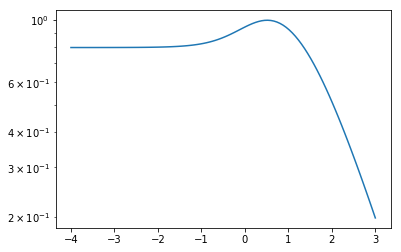

In [156]:


n = 1. 
l = 0
E = 1.
Z = 1.

coeff_array = np.linspace(-4, 3, 100)

E_array = 10**(coeff_array)*Z**2*R

x_array = np.log(E_array/(Z**2*R))
gaunt_array = []

for E in E_array: 
    s_kramer = get_kramer_sigma(n, E, Z)
#     s_below = sigma_bf_below(n, l, E, Z)
    s_above = sigma_bf_above(n, l, E, Z)

    gaunt_array.append(get_gaunt_factor_bf(s_above, s_kramer))
#     print s_above, s_kramer, get_gaunt_factor_bf(s_below, s_above, s_kramer)
    
plt.figure()
plt.plot(coeff_array, gaunt_array)
plt.yscale("log")
# plt.gca().invert_yaxis()
plt.show()

    

In [81]:
logc_test = np.arange(-16., 13.)

c_test = 10.**logc_test

print c_test
E_testarr = R*c_test

[  1.00000000e-16   1.00000000e-15   1.00000000e-14   1.00000000e-13
   1.00000000e-12   1.00000000e-11   1.00000000e-10   1.00000000e-09
   1.00000000e-08   1.00000000e-07   1.00000000e-06   1.00000000e-05
   1.00000000e-04   1.00000000e-03   1.00000000e-02   1.00000000e-01
   1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
   1.00000000e+04   1.00000000e+05   1.00000000e+06   1.00000000e+07
   1.00000000e+08   1.00000000e+09   1.00000000e+10   1.00000000e+11
   1.00000000e+12]


In [83]:

for ie, E_test in enumerate(E_testarr):
    st_kramer = get_kramer_sigma(n, E_test, Z)
    st_below = sigma_bf_below(n, l, E_test, Z)
    st_above = sigma_bf_above(n, l, E_test, Z)

    gf = get_gaunt_factor_bf(st_below, st_above, st_kramer)
    
    print c_test[ie], gf

1e-16 1.58578109911e-29
1e-15 1.74327980848e-28
1e-14 2.29039999268e-27
1e-13 4.51120126908e-26
1e-12 1.64405449381e-24
1e-11 1.03229975971e-22
1e-10 8.6833759522e-21
1e-09 8.19437371907e-19
1e-08 8.04268668564e-17
1e-07 7.99501279023e-15
1e-06 7.97995488401e-13
1e-05 7.97508027094e-11
0.0001 7.97238103804e-09
0.001 7.95996235872e-07
0.01 7.84184620623e-05
0.1 0.00679371931874
1.0 0.235584277599
10.0 0.765623189703
100.0 0.502820084178
1000.0 0.198241912074
10000.0 0.0671349783005
100000.0 0.0216921841267
1000000.0 0.00690646734325
10000000.0 0.00218871461103
100000000.0 0.000692602696883
1000000000.0 0.000219067258356
10000000000.0 6.92798557738e-05
100000000000.0 2.19086846452e-05
1e+12 6.92818146467e-06


In [105]:
.1*R

2.1798741e-12

In [115]:
math.factorial(0)

1